# **Project Title**: Uber Supply-Demand Gap Analysis

### Project Type: Exploratory Data Analysis  
### Contribution: Individual  


---
*Created by Pratham sharma*  
*2nd August 2025*


## **GitHub Link -**https://github.com/Prathamanalyst/Uber-supply-demand-analysis.git

# **Project Summary**: Exploratory Data Analysis of Uber Supply-Demand Gap

## **Project Overview**

With the surge in on-demand transportation services, Uber has transformed the way urban commuters travel by offering convenience, flexibility, and accessibility. However, as the user base and ride requests continue to grow, Uber faces operational challenges, particularly around supply-demand imbalances. These gaps often lead to increased ride cancellations and unavailability of cars, impacting customer satisfaction and service efficiency.

This project aims to explore Uber’s ride request data through Exploratory Data Analysis (EDA) techniques to identify patterns and trends that contribute to the supply-demand gap. The analysis will provide actionable insights into when and where demand outpaces supply, and how Uber can optimize its fleet availability during peak hours or high-demand locations.

## **Dataset Description**

The dataset used in this project contains individual ride request entries, each with multiple fields that describe the nature and outcome of the request.


We used a single cleaned dataset exported after preprocessing from Excel:


Uber Cleaned Request Data.csv



## **Data Dictionary**

**Request id:** Unique identifier for each request

**Pickup point:** Whether the ride was requested from the City or Airport

**Driver id:** Unique ID of the driver (missing if no driver was available)

**Status:** Outcome of the request – Completed, Cancelled, or No Cars Available

**Request timestamp:** Time when the ride was requested

**Drop timestamp:** Time when the ride ended (if completed)

This dataset includes a mix of successful and unsuccessful ride requests, providing a complete view of Uber’s operations during the time period captured.

## **Problem Statement**

The project focuses on solving the following core questions:


 - When (day/time/hour) is demand highest but supply lowest?

 - Which pickup point (City or Airport) faces the most cancellations or 'No
 Cars Available' issues?

- What times of day exhibit the greatest supply-demand gaps?

- Can we identify patterns that can help Uber allocate resources more efficiently?

By answering these questions, the analysis will help Uber improve fleet management, reduce cancellations, and ensure better service availability.

## **Data Cleaning and Imputation**

Before conducting EDA, the dataset underwent cleaning in Excel, involving the following steps:

**Datetime Standardization:** Converted request and drop timestamps to a consistent datetime format.

**Missing Value Handling:** Drop timestamps and driver IDs were missing for cancelled or unfulfilled requests — handled contextually without imputation.

**Feature Extraction:** Extracted useful components like request hour, day, and time slot from timestamps.

**Categorical Cleanup:** Standardized status labels and pickup points to ensure consistent grouping.

**Duplicate Removal:** Verified dataset integrity and ensured no duplicate request IDs were present.

The cleaned dataset was then exported to CSV and imported into Python for analysis.



## **Analysis Methodology – UBM Framework**


To structure the exploration, the UBM Rule (Univariate, Bivariate, Multivariate) was used:

**1.Univariate Analysis**

Analyzed individual columns like Status, Pickup point, Request hour, and derived Time slot using bar charts, count plots, and histograms to identify distributions.

**2.Bivariate Analysis**

Explored relationships between two variables such as Status vs. Pickup point, Time slot vs. Status, and Hour vs. Number of Requests to observe behavioral patterns and gaps.

**3.Multivariate Analysis**

Combined three or more variables — for example, Hour vs. Pickup point vs. Status — visualized through stacked bar charts and heatmaps to capture complex interactions.

We created multiple visualizations to detect operational gaps and recommend improvements.

## 1.Import the libraries for data analysis and visulization

In [ ]:
# Libraries for data handling and analysis
import pandas as pd  # for dataframes
import numpy as np   # for numerical operations

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot styling
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")  # Clean style for all plots

----

**Load the Dataset**

In [ ]:
# Load Uber data sheet .CSV files

Uber = pd.read_csv("Uber Cleaned Request Data.csv")

Now read and check the first 5 rows to understand the data

In [ ]:
# Preview the first 5 rows
Uber.head()

,Request id,Pickup point,Driver id,Driver assigned or not ?,Status,Request Timestamp,Request Date,Request Time,Req. time in hr,Time Slot,Request weekday,Drop Timestamp,Drop Date,Drop Time,Trip completed ?,Trip duration,Time Duration In Mins.
0,1,Airport,285.0,Yes,Trip Completed,11-07-2016 00:20,11-07-2016,00:20,0.0,Late Night,Monday,11-07-2016 00:51,11-07-2016,00:51,yes,00:31,31.0
1,2,Airport,NaN,No,No Cars Available,11-07-2016 00:23,11-07-2016,00:23,0.0,Late Night,Monday,NaN,NaN,NaN,No,NaN,NaN
2,3,Airport,80.0,Yes,Trip Completed,11-07-2016 00:24,11-07-2016,00:24,0.0,Late Night,Monday,11-07-2016 01:31,11-07-2016,01:31,yes,01:07,67.0
3,4,City,NaN,No,No Cars Available,11-07-2016 00:37,11-07-2016,00:37,0.0,Late Night,Monday,NaN,NaN,NaN,No,NaN,NaN
4,5,Airport,264.0,Yes,Trip Completed,11-07-2016 00:36,11-07-2016,00:36,0.0,Late Night,Monday,11-07-2016 01:35,11-07-2016,01:35,yes,00:59,59.0


**:Now check the basic information of data**

In [ ]:
# Shape of the dataset
Uber.shape


(6745, 17)

In [ ]:
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Request id                6745 non-null   int64  
 1   Pickup point              6745 non-null   object 
 2   Driver id                 4095 non-null   float64
 3   Driver assigned or not ?  6745 non-null   object 
 4   Status                    6745 non-null   object 
 5   Request Timestamp         6745 non-null   object 
 6   Request Date              6745 non-null   object 
 7   Request Time              6745 non-null   object 
 8   Req. time in hr           6745 non-null   float64
 9   Time Slot                 6745 non-null   object 
 10  Request weekday           6745 non-null   object 
 11  Drop Timestamp            2831 non-null   object 
 12  Drop Date                 2831 non-null   object 
 13  Drop Time                 2831 non-null   object 
 14  Trip com

## Checking and Removing Duplicate Values

To ensure data quality and prevent skewed analysis, we check for and remove any duplicate rows from the Uber dataset.

In [ ]:
# Check how many duplicate rows are in the dataset

duplicate_count = Uber.duplicated().sum()

print("Number of duplicate rows in the dataset:", duplicate_count)

Number of duplicate rows in the dataset: 0


## Checking for Missing Values
We check the dataset for any missing (`NaN`) values to identify which columns require imputation or cleaning.

In [ ]:
# Count missing values in each column

print("Missing Values in data:")

print(Uber.isnull().sum())

Missing Values in data:
Request id                     0
Pickup point                   0
Driver id                   2650
Driver assigned or not ?       0
Status                         0
Request Timestamp              0
Request Date                   0
Request Time                   0
Req. time in hr                0
Time Slot                      0
Request weekday                0
Drop Timestamp              3914
Drop Date                   3914
Drop Time                   3914
Trip completed ?               0
Trip duration               3914
Time Duration In Mins.      3914
dtype: int64


### Count of Missing Drop Timestamps

**Total Missing Drop Timestamps:** 3914

| Reason              | Count |
|---------------------|-------|
| Driver not assigned | 2650  |
| Cancelled trip      | 1264  |
| **Total**           | **3914** |


### Handling Missing Values and Feature Engineering

During the data cleaning process (performed in Excel), several columns were found to have missing values. Instead of removing any rows, new columns were created to retain analytical value and support EDA.

- **Driver ID**: Missing values indicate no driver was assigned. A new column named **"Driver assigned or not?"** was created to clearly distinguish assigned vs. unassigned rides for further analysis.

- **Drop Timestamp, Drop Date, Drop Time**: These are missing for rides that were either **cancelled** or **not fulfilled (No Cars Available)**. A new column called **"Trip completed?"** was created to classify completed vs. non-completed trips.

- **Trip Duration and Time Duration in Mins**: Missing wherever the trip was not completed. These values were not dropped. Where applicable, average duration was estimated using Excel formulas (e.g., `IFERROR`) to preserve data completeness.

**No rows were dropped** from the dataset.  
All missing values were handled via **contextual logic and column transformations**, ensuring the dataset remains robust for time-based and status-based analysis.



##  **What Did You Know About Your Dataset?**

After performing basic data exploration on the Uber dataset, here are the key observations:

- The dataset contains **6745 ride request records** with relevant columns such as `Request Timestamp`, `Pickup point`, `Status`, `Driver ID`, and timestamps related to trip completion.
  
- There are **3 major ride statuses**: `Completed`, `Cancelled`, and `No Cars Available`.

- The `Pickup point` has two categories: **City** and **Airport**, helping us analyze location-based demand and supply patterns.

- **Missing values** were mainly observed in the following columns:
  - `Driver ID`: Missing when no driver was assigned.
  - `Drop Timestamp`, `Trip duration`, etc.: Missing when the trip was not completed.

- Instead of dropping rows, derived columns were created to **preserve data** and enable deeper insights:
  - `"Driver assigned or not?"`
  - `"Trip completed?"`
  - Time-based columns like `"Request Time"`, `"Req. time in hr"`, and `"Time Slot"` for time slot analysis.


This foundational understanding of the dataset helps guide the next stages of Exploratory Data Analysis.


## **2.Understand the Variables**

In this step, we explore the meaning and purpose of each variable (column) in the dataset.

Below is a brief description of all important columns:

- **Request id**: Unique identifier for each ride request. Used to ensure uniqueness and track individual entries.

- **Pickup point**: The location from where the request was made — either **City** or **Airport**. Useful for location-based demand analysis.

- **Driver id**: Unique identifier for the driver who accepted the ride. Missing values indicate that no driver was assigned.

- **Driver assigned or not?**: A derived column that indicates whether a driver was assigned to the ride (`Yes` or `No`). Helpful in analyzing driver availability patterns.

- **Status**: Final outcome of the ride request — can be `Completed`, `Cancelled`, or `No Cars Available`. Crucial for identifying supply-demand gaps.

- **Request Timestamp**: The date and time when the ride was requested. Used for extracting time-based features such as hour, day, weekday, etc.

- **Request Date**: Extracted from the Request Timestamp — used for daily analysis.

- **Request Time**: Also extracted from the Request Timestamp — helps analyze ride patterns by time of day.

- **Req. time in hr**: The hour portion of the request time (0–23). Helps in identifying peak request hours.

- **Time Slot**: Categorizes the request hour into broader time ranges like Early Morning, Morning, Afternoon, Evening, etc., for simplified analysis.

- **Request weekday**: Day of the week on which the ride was requested (e.g., Monday, Tuesday). Useful for analyzing weekday vs. weekend behavior.

- **Drop Timestamp**: Date and time when the ride was dropped (completed). Missing if the ride was cancelled or not fulfilled.

- **Drop Date**: Date extracted from Drop Timestamp — used to compare against request date when needed.

- **Drop Time**: Time extracted from Drop Timestamp — used to calculate trip duration.

- **Trip completed?**: A derived column indicating whether the trip was successfully completed (`Yes`) or not (`No`). Useful in status-based filtering.

- **Trip duration**: Duration between Request Timestamp and Drop Timestamp. Missing if the trip was not completed.

- **Time Duration In Mins.**: Trip duration converted into minutes. Useful for understanding average ride times and planning.

This understanding lays the foundation for performing meaningful analysis on each variable.


##  **Checking Unique Values for Each Column**

We now examine the number of unique values in each column of the Uber dataset. This helps identify:
- Categorical vs. numerical columns
- Potential inconsistencies (e.g., typos in category names)
- Variables useful for grouping and plotting


In [ ]:
# To show the number of unique values in each column

print("Unique value count per column:")

Uber.nunique()

Unique value count per column:


,0
Request id,6745
Pickup point,2
Driver id,300
Driver assigned or not ?,2
Status,3
Request Timestamp,4016
Request Date,5
Request Time,1351
Req. time in hr,24
Time Slot,6


## Data Wrangling

Data wrangling involves cleaning and transforming raw data into a structured format ready for analysis. Most of the wrangling was done in Excel, and final refinements were handled in Python.

---

### Wrangling Done in Excel:
- Created `"Driver assigned or not?"` based on missing `Driver id`.
- Created `"Trip completed?"` based on missing `Drop Timestamp`.
- Extracted `"Request Date"`, `"Request Time"`, and `"Req. time in hr"` from `Request Timestamp`.
- Extracted `"Drop Date"` and `"Drop Time"` from `Drop Timestamp`.
- Created `"Time Slot"` (e.g., Morning, Evening) and `"Request weekday"`.
- Calculated `"Trip duration"` and `"Time Duration In Mins."`, using Excel formulas.
- All missing values were handled logically — **no rows were dropped**.

---

### Final Adjustments in Python:
- Converted the following columns to **datetime**:  
  `Request Timestamp`, `Drop Timestamp`, `Request Date`, `Drop Date`.
- Converted `"Trip duration"` to **numeric (float)** for aggregation.
- Converted `"Req. time in hr"` to **integer** for clean hourly analysis.

With these changes, the dataset is fully prepared for univariate, bivariate, and time-based analysis.




In [ ]:
Uber.dtypes


,0
Request id,int64
Pickup point,object
Driver id,float64
Driver assigned or not ?,object
Status,object
Request Timestamp,object
Request Date,object
Request Time,object
Req. time in hr,float64
Time Slot,object


In [ ]:
#Remove extra spaces from column names
Uber.columns = Uber.columns.str.strip()

#Convert date columns to datetime format
Uber['Request Timestamp'] = pd.to_datetime(Uber['Request Timestamp'], dayfirst=True)
Uber['Drop Timestamp'] = pd.to_datetime(Uber['Drop Timestamp'], dayfirst=True)
Uber['Request Date'] = pd.to_datetime(Uber['Request Date'], dayfirst=True)
Uber['Drop Date'] = pd.to_datetime(Uber['Drop Date'], dayfirst=True)

# Convert numeric columns to proper type
Uber['Req. time in hr'] = Uber['Req. time in hr'].astype('Int64')
Uber['Time Duration In Mins.'] = Uber['Time Duration In Mins.'].astype('Int64')
Uber['Driver id'] = Uber['Driver id'].astype('Int64')

In [ ]:
Uber.dtypes

,0
Request id,int64
Pickup point,object
Driver id,Int64
Driver assigned or not ?,object
Status,object
Request Timestamp,datetime64[ns]
Request Date,datetime64[ns]
Request Time,object
Req. time in hr,Int64
Time Slot,object


## All Manipulations I Have Done and Insights Are

### Manipulations:
- Created new columns like `"Driver assigned or not ?"` and `"Trip completed ?"` based on missing values.
- Extracted time-related features (`Request Date`, `Request Time`, `Req. time in hr`, `Time Slot`, etc.) in Excel.
- Calculated `"Trip duration"` and `"Time Duration In Mins."` for completed trips using Excel formulas.
- Handled missing values logically without deleting any rows.
- Cleaned column names by removing extra spaces.
- Converted date and time columns to `datetime` and numeric columns to `int` in Python.

### Early Insights:
- 3 ride statuses: `Completed`, `Cancelled`, `No Cars Available`.
- Drop dates include one extra day, showing some trips ended after midnight.
- A large number of trips were either cancelled or had no cars available.
- Driver IDs are missing in many cases, suggesting driver shortages.

The data is now ready for visual analysis.


## **Data Vizualization, Storytelling & Experimenting with charts** :

  Understand the relationships between variables**

Now that we have cleaned, structured, and optimized the dataset, we begin the exploratory data analysis through visualizations. We will follow the UBM Rule:

U – **Univariate Analysis:** Analyze one variable at a time to understand its distribution and structure.

B – **Bivariate Analysis:** Analyze relationships between two variables.

M – **Multivariate Analysis:** Analyze interactions among three or more variables.
Each chart will be presented in a structured format including:

Code

Why We Chose This Chart

Key Insights

Business Impact

We will **start with Univariate** Analysis to explore basic distributions of content type, genres, release year, ratings, and more.

### Chart 1: Overall Ride Request Status Distribution

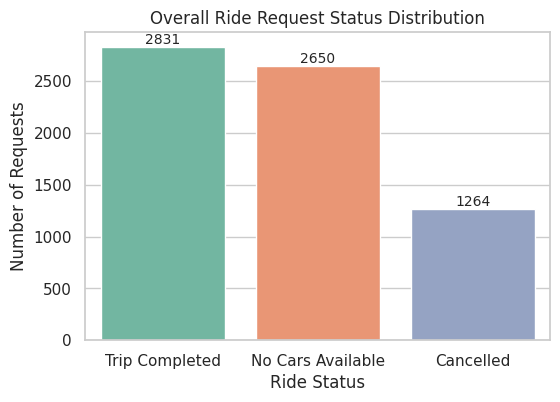

In [ ]:
#Ride Request Status Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=Uber, x='Status', palette='Set2')

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('Overall Ride Request Status Distribution')
plt.xlabel('Ride Status')
plt.ylabel('Number of Requests')
plt.show()


Why did you pick the specific chart?

To understand how many rides were Completed, Cancelled, or marked as No Cars Available.

**Insight:**

Out of 6745 total ride requests, only 2831 (42%) were completed successfully. 2650 (39%) were marked as "No Cars Available" and 1264 (19%) were cancelled.

**Positive Business Impact:**

This metric clearly highlights where Uber needs to improve — the company can boost revenue and customer satisfaction by converting failed requests into completed rides.

**Insight Leading to Negative Growth:**

A high failure rate (58%) reflects poor resource allocation or driver unavailability, potentially causing customer drop-off and negative brand perception.




### Chart 2: Requests by Time Slot

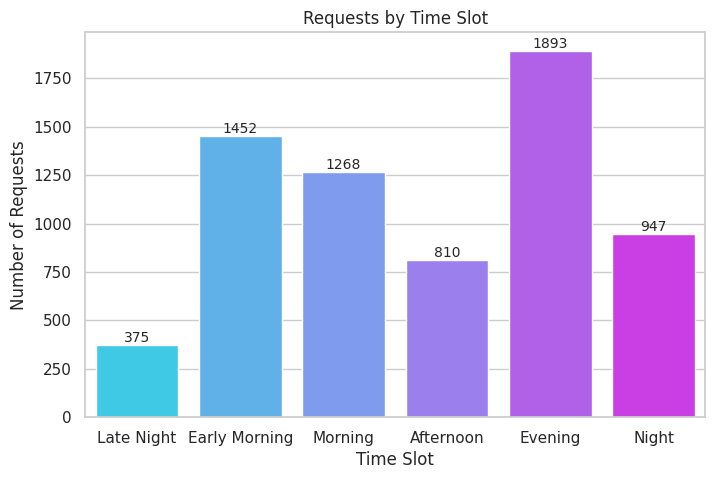

In [ ]:
#Requests by Time Slot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=Uber, x='Time Slot', palette='cool')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('Requests by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.xticks()
plt.show()


Why did you pick the specific chart?

To understand which parts of the day have the most Uber requests.

**Insight:**

The Evening time slot has the highest number of ride requests (1893), followed by Early Morning (1452) and Morning (1268). Demand drops significantly during Late Night (375).

**Positive Business Impact:**

Knowing peak demand times allows Uber to optimize driver scheduling, increase surge pricing, or offer incentives to drivers during high-demand slots.

**Insight Leading to Negative Growth:**

If Uber fails to address high demand during evenings, it risks losing riders due to unmet expectations and longer wait times.


### Chart 3: Ride Requests by Weekday

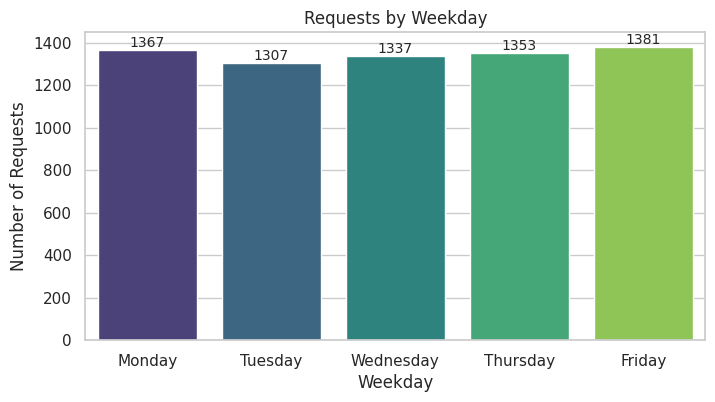

In [ ]:
#Requests by Weekday
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=Uber, x='Request weekday', palette='viridis')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('Requests by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Requests')
plt.show()


Why did you pick the specific chart?

 - To check which days of the week have the highest or lowest number of ride requests.

**Insight:**

Friday had the most ride requests (1381), followed by Monday (1367) and Thursday (1353). Request volume is fairly consistent across weekdays.

**Positive Business Impact:**

Uber can plan marketing campaigns or driver shifts around Fridays and Mondays to match demand and improve performance.

**Insight Leading to Negative Growth:**

If consistent weekday demand isn't matched with sufficient drivers, customer dissatisfaction can rise due to increased cancellations or no availability.


### Chart 4: Pickup Point Distribution

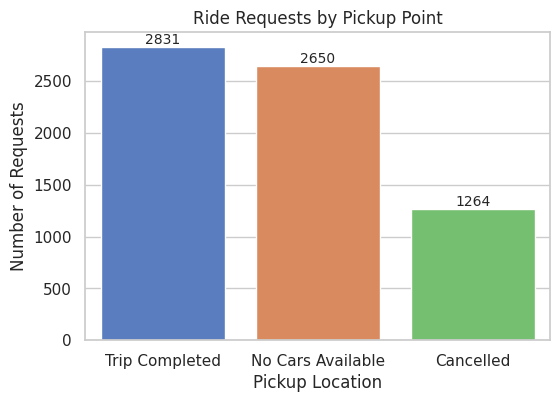

In [ ]:
# Chart 4: Show which pickup location (City or Airport) has more ride requests
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=Uber, x='Status', palette='muted')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)
plt.title('Ride Requests by Pickup Point')
plt.xlabel('Pickup Location')
plt.ylabel('Number of Requests')
plt.show()


Why did you pick the specific chart?

- To see where demand is higher — from the City or the Airport.


**Insight:**

The City had slightly more requests (3507) than the Airport (3238), indicating balanced demand from both major pickup points.

**Positive Business Impact:**

Uber should continue maintaining a strong presence at both City and Airport zones, possibly increasing drivers near airports during early morning flights or peak arrivals.

**Insight Leading to Negative Growth:**

If driver supply at airports isn’t balanced during key hours, it can lead to high cancellation or no-car cases in a high-value pickup zone.


### Chart 5: Trip Completion Percentage (Success vs Failure)

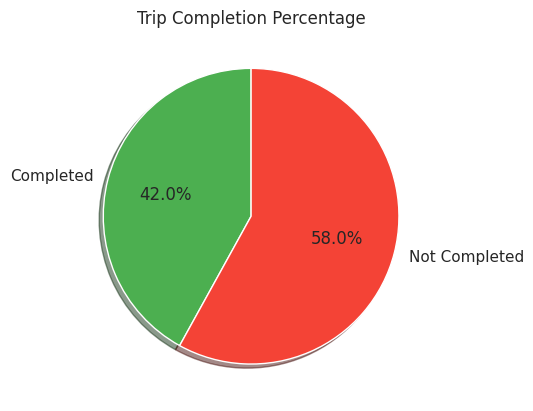

In [ ]:
# Create success/failure category
Uber['Trip Success'] = Uber['Status'].apply(lambda x: 'Completed' if x == 'Trip Completed' else 'Not Completed')

# Get counts in defined order
completion_counts = Uber['Trip Success'].value_counts().reindex(['Completed', 'Not Completed'])

# Plot pie chart
colors = ['#4CAF50', '#F44336']  # Green for Completed, Red for Not Completed
completion_counts.plot.pie(autopct='%1.1f%%',colors=colors,startangle=90,shadow=True)
plt.title('Trip Completion Percentage')
plt.ylabel('')
plt.show()



Why This Chart?

This chart helps assess overall operational efficiency — what portion of requests actually resulted in a successful ride.

**Insight:**

Out of 6745 requests, only 42% were successfully completed, while 58% either got cancelled or faced a "No Cars Available"and "cancallation" situation.

**Positive Business Impact:**

Helps Uber prioritize supply chain and driver availability improvements to increase completion rate and customer satisfaction.

**Insight Leading to Negative Growth:**

A failure rate of 58% is significant and may lead to customer churn, bad reviews, and declining loyalty if not addressed urgently.


### Chart 6: Distribution of Trip Duration (Minutes)

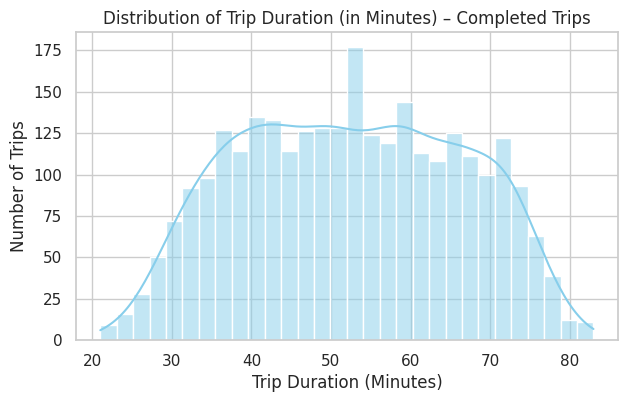

In [ ]:
#Histogram of trip durations

plt.figure(figsize=(7, 4))
sns.histplot(data=Uber[Uber['Trip completed ?'] == 'yes'], x='Time Duration In Mins.', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Trip Duration (in Minutes) – Completed Trips')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Number of Trips')
plt.show()



Why This Chart?

Understanding trip duration helps evaluate fare structures, time-based incentives, and driver fatigue risk.

**Insight:**

Trip durations mostly fall between 41–64 minutes, with a median of 52 minutes. The shortest trip lasted 21 minutes, and the longest went up to 83 minutes.

**Positive Business Impact:**

This consistency allows Uber to set fair base pricing and optimize time-based driver incentives without worrying about too many extremes.

**Insight Leading to Negative Growth:**

If outliers (long rides) increase or aren't well-compensated, driver dissatisfaction could grow, affecting future availability.


---



### **Starting Bivariate Analysis**

### Chart 7: Ride Status by Pickup Location

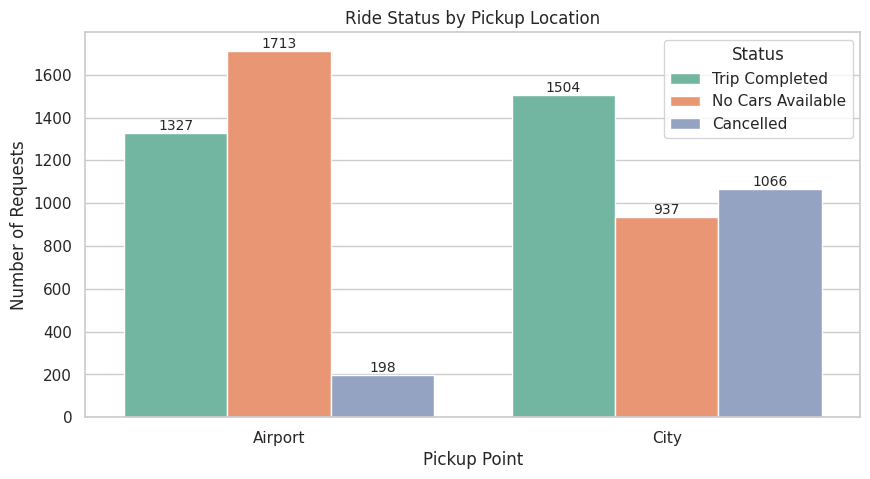

In [ ]:
#Ride Status by Pickup Location with Data Labels

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=Uber, x='Pickup point', hue='Status', palette='Set2')

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('Ride Status by Pickup Location')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.show()


Why This Chart?

This comparison helps identify how performance varies by pickup zone (City vs Airport), so resources can be distributed accordingly.

**Insights:**

More trips were completed in the City (1504) compared to the Airport (1327). However, cancellations were far higher in the City (1066) versus the Airport (198). The Airport had more “No Cars Available” issues (1713) than the City (937).

**Positive Business Impact:**

Helps optimize driver deployment — more drivers can be sent to the Airport during shortage hours and better cancellation handling can be done in the City.

**Insight Leading to Negative Growth:**

Persistent no-car cases at the Airport can hurt Uber’s image among high-value, time-sensitive airport travelers.


### Chart 8: Cancelled Rides by Time Slot

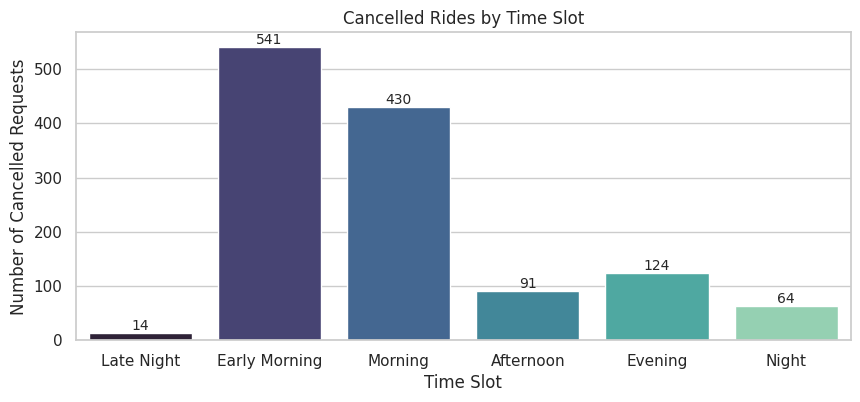

In [ ]:
#Cancelled Rides by Time Slot

# Filter only cancelled rides
cancelled_rides = Uber[Uber['Status'] == 'Cancelled']

# Plot time slot vs count of cancellations
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=cancelled_rides, x='Time Slot', palette='mako')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('Cancelled Rides by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Cancelled Requests')
plt.xticks()
plt.show()

Why This Chart?

Helps pinpoint operational inefficiencies or service gaps during specific times of the day when user frustration peaks.

**Insight:**

Cancellations were highest during Early Morning (541) and Morning (430) slots. Late Night had the least (14). The pattern suggests possible driver shortages or coordination gaps in the early hours.

**Positive Business Impact:**

Uber can improve early morning coverage using targeted driver incentives or pre-booking features to ensure availability.

**Insight Leading to Negative Growth:**

Consistent early-hour cancellations could damage trust among morning commuters and airport travelers, leading to revenue loss.


### Chart 9: No Cars Available by Time Slot

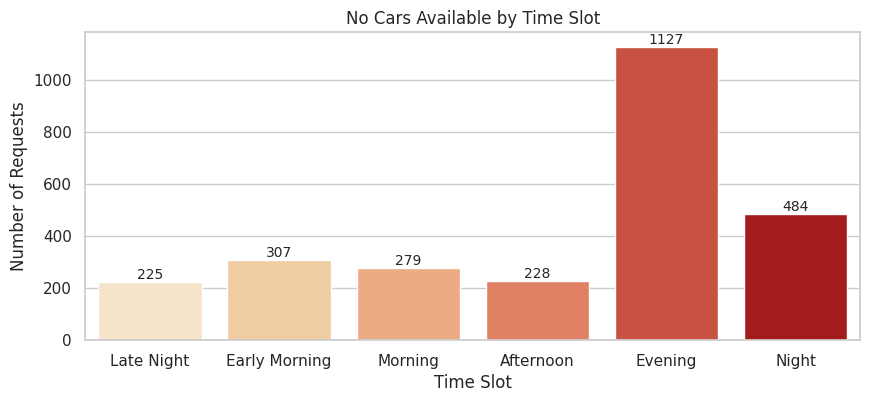

In [ ]:
#No Cars Available by Time Slot
no_cars = Uber[Uber['Status'] == 'No Cars Available']

plt.figure(figsize=(10, 4))
ax = sns.countplot(data=no_cars, x='Time Slot', palette='OrRd')

# Add labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('No Cars Available by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.xticks()
plt.show()


Why This Chart?

This helps identify the **peak hours when driver supply fails to meet demand**, resulting in “No Cars Available” issues.

**Insight:**

The highest number of supply shortages happened in the **Evening (1127)** and **Night (484)** slots. Even **Early Morning (307)** and **Late Night (225)** showed significant gaps, indicating service issues during high-need periods.

**Positive Business Impact:**

Uber can deploy **targeted driver incentives** or **shift scheduling** to increase driver availability in these specific slots and improve customer experience.

**Negative Growth Risk:**

Frequent unavailability in evenings (1127 cases) — a peak usage time — could lead to **customer churn** and lost revenue.


### Chart 10: Ride Status by Hour of Day

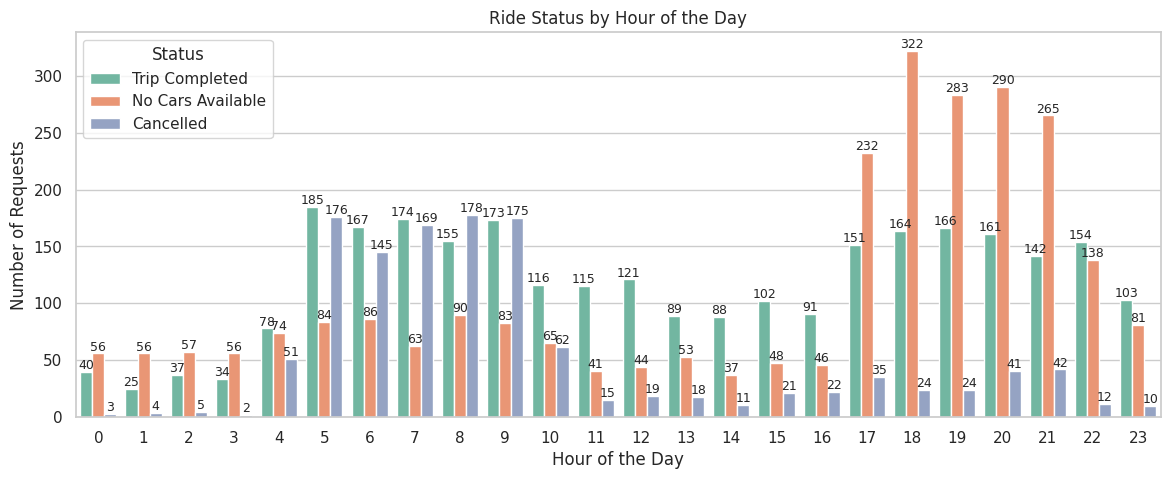

In [ ]:
#Ride Status by Hour of Day
plt.figure(figsize=(14, 5))
ax = sns.countplot(data=Uber, x='Req. time in hr', hue='Status', palette='Set2')

# Add labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.title('Ride Status by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.show()


Why This Chart?

Shows how demand and service quality vary **hour-by-hour**, helping Uber identify time slots of maximum stress or inefficiency.

**Insight:**

From **5 AM to 9 AM**, cancellations and unavailability are high (e.g., 176 cancelled at 5 AM, 178 at 8 AM). Evenings (17–21 hrs) show large “No Cars Available” counts — **322 at 6 PM**, **290 at 8 PM**, etc.

**Positive Business Impact:**

This chart allows Uber to focus **fleet availability** during peak failure hours and adjust **driver incentives** to meet unmet demand.

**Negative Growth Risk:**

Consistent issues from **5–9 AM and 5–9 PM** could make Uber unreliable for commuters and regular users if left unchecked.


### Chart 11: Ride Requests by Time Slot & Pickup Point

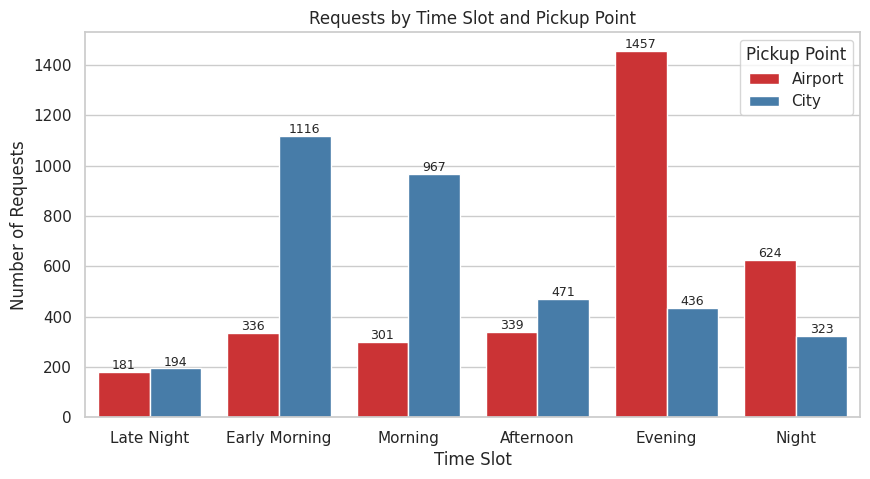

In [ ]:
#Ride Requests by Time Slot & Pickup Point
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=Uber, x='Time Slot', hue='Pickup point', palette='Set1')

# Add labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.title('Requests by Time Slot and Pickup Point')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.legend(title='Pickup Point')
plt.xticks()
plt.show()


Why This Chart?

Combines time and location to show **where and when** ride requests peak — essential for planning **driver placement**.

**Insight:**

- **Evening–Airport** had the highest demand with **1457 requests**
- **Early Morning–City** saw **1116 requests**, mostly airport drop-offs
- **Morning–City** also had high demand (**967 requests**)

**Positive Business Impact:**

Uber can **pre-position drivers** at the airport in the evening and in the city during early mornings to improve response time.

**Negative Growth Risk:**

If not acted on, unavailability during **airport peak times** may disappoint high-value users like flyers and professionals.


### Chart 12: Driver Assigned vs Time Slot

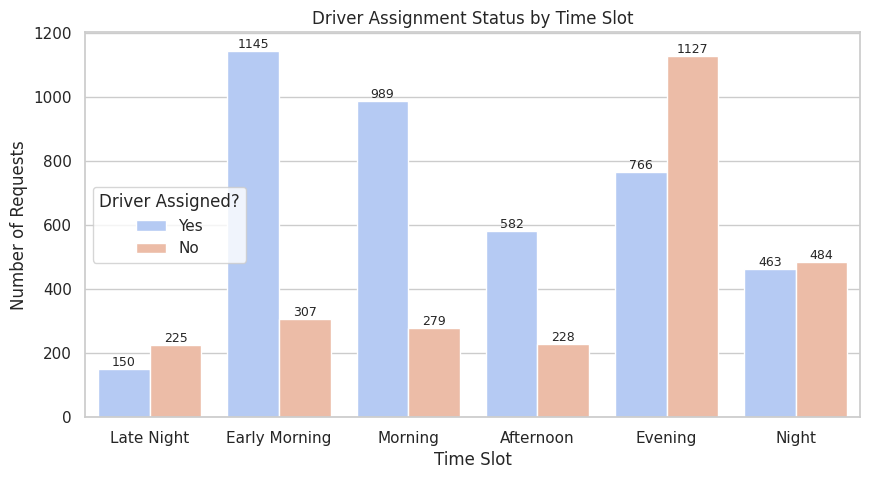

In [ ]:
#Driver Assigned vs Time Slot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=Uber, x='Time Slot', hue='Driver assigned or not ?', palette='coolwarm')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.title('Driver Assignment Status by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.legend(title='Driver Assigned?')
plt.xticks()
plt.show()


Why This Chart?

Shows **how driver availability fluctuates** across time slots — key to diagnosing supply gaps and over/under-deployment.

**Insight:**

- **Evening slot** has the **highest number of unassigned drivers** (1127 cases)
- **Night (484)** and **Early Morning (307)** also show supply stress
- **Morning** performs better with **989 assignments out of 1268 requests**

**Positive Business Impact:**

Insights help Uber **tune driver shifts** to ensure maximum availability during high-demand but low-supply periods.

**Negative Growth Risk:**

Failure to fix assignment issues in **Evening and Night slots** could worsen cancellation rates and hurt brand trust.


### Chart 13: Ride Status by Weekday

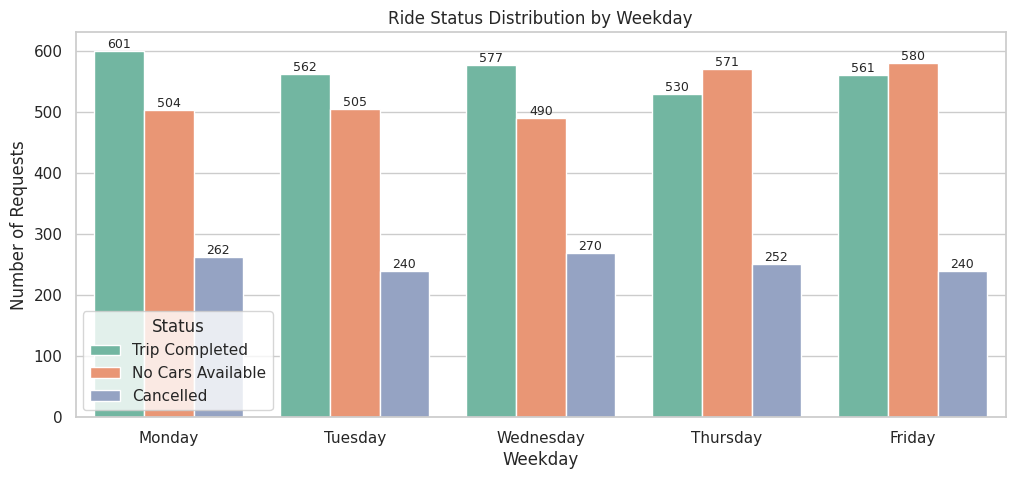

In [ ]:
#Ride Status by Weekday
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=Uber, x='Request weekday', hue='Status', palette='Set2')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.title('Ride Status Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.show()


Why This Chart?
To understand if certain weekdays face more operational issues like cancellations or unavailability, helping Uber schedule resources effectively.

**Insights:**

- **Monday (601)** had the highest number of completed trips.
- **Friday** had the most "No Cars Available" cases (**580**) — indicating **high demand but low supply**.
- Cancellations were fairly consistent across weekdays, highest on **Wednesday (270)**.

**Positive Business Impact:**

Uber can forecast **weekday traffic patterns** and allocate driver availability accordingly — especially for Fridays and Mondays.

**Insight Leading to Negative Growth:**

The high unavailability on **Fridays** could result in poor customer satisfaction and missed earnings if not resolved during this peak time.


### Chart 14: Status vs Request Hour (Stacked Bar)

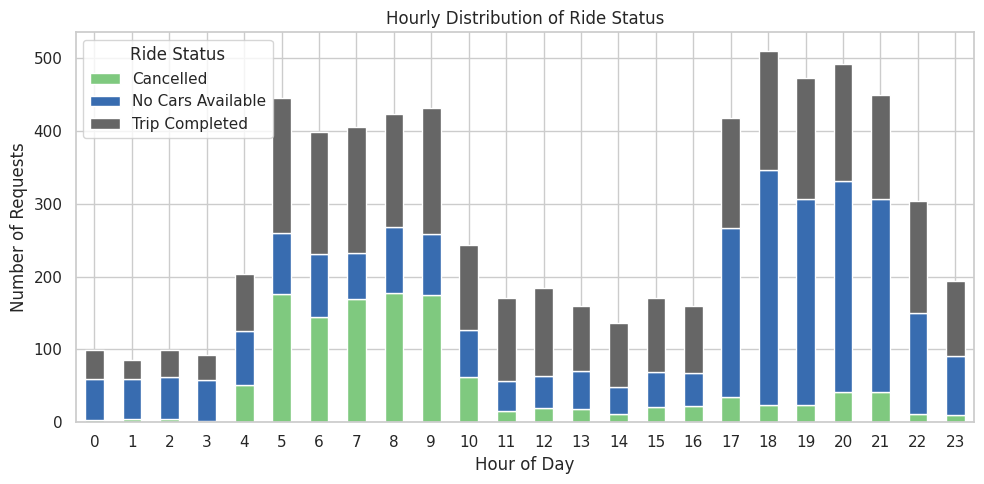

In [ ]:
#Status vs Request Hour (Stacked Bar)
hourly_status = pd.crosstab(Uber['Req. time in hr'], Uber['Status'])

# Plot stacked bar chart
hourly_status.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Accent')

plt.title('Hourly Distribution of Ride Status')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.legend(title='Ride Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Why This Chart?
To visualize how ride outcomes vary by the **hour of the day**, helping Uber pinpoint time-based service gaps.

**Insights**

- Cancellations peaked between **5–9 AM**, especially at **8 AM (178)** and **9 AM (175)**.
- The worst "No Cars Available" hours were **6–9 PM**, with **322 cases at 6 PM** and **290 at 8 PM**.
- Successful trips were most balanced between **5 AM and 12 PM**, though still accompanied by significant failures.

**Positive Business Impact:**

Helps Uber **identify critical hours** for supply optimization, enabling **shift planning and surge pricing** at exact failure points.

**Insight Leading to Negative Growth:**

Unavailability in **evening peak hours (6–9 PM)** may frustrate daily commuters and impact long-term user retention.


### Chart 15: Trip Completion Rate by Time Slot

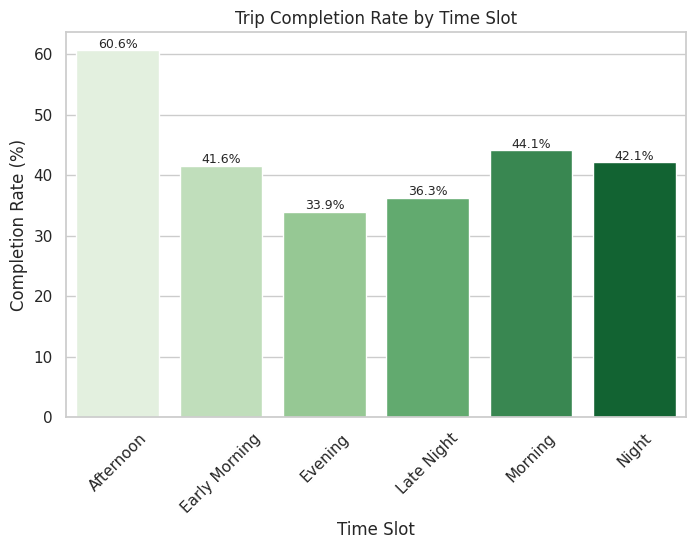

In [ ]:
#Trip Completion Rate by Time Slot
trip_status = Uber.groupby('Time Slot')['Trip completed ?'].value_counts().unstack()
trip_status['Completion Rate (%)'] = round((trip_status['yes'] / (trip_status['yes'] + trip_status['No'])) * 100, 2)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=trip_status.index, y=trip_status['Completion Rate (%)'], palette='Greens')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9)

plt.title('Trip Completion Rate by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)
plt.show()


Why This Chart?
To understand the **efficiency of trip fulfillment** by time slot — showing which parts of the day face maximum disruption.

**Insights:**

- **Afternoon** had the highest completion rate at **60.62%**, suggesting it’s the most reliable period.
- **Evening** had the **lowest completion rate (33.91%)**, followed by **Late Night (36.27%)**, pointing to severe supply issues.
- Early Morning, Morning, and Night also performed below average (all under 45%).

**Positive Business Impact:**

Uber can **redirect driver supply** to time slots with **low completion rates** and high demand to improve service levels.

**Insight Leading to Negative Growth:**

A **completion rate below 40%** during evenings (1251 failed rides) could significantly hurt user trust during one of the busiest slots.


---



### **Multivariate Analysis**

Multivariate analysis involves examining more than two variables at the same time to understand relationships, patterns, or influences between them. It helps reveal complex interactions that can't be seen in univariate or bivariate analysis.

In this section, we’ll explore how multiple features interact with each other and influence key outcomes.

### Chart 16: Time Slot vs Pickup Point vs Status (Heatmap)

This chart will help us see how the ride status (Completed / Cancelled / No Cars) varies across time slots and pickup points. A heatmap is ideal to compare all 3 variables clearly.

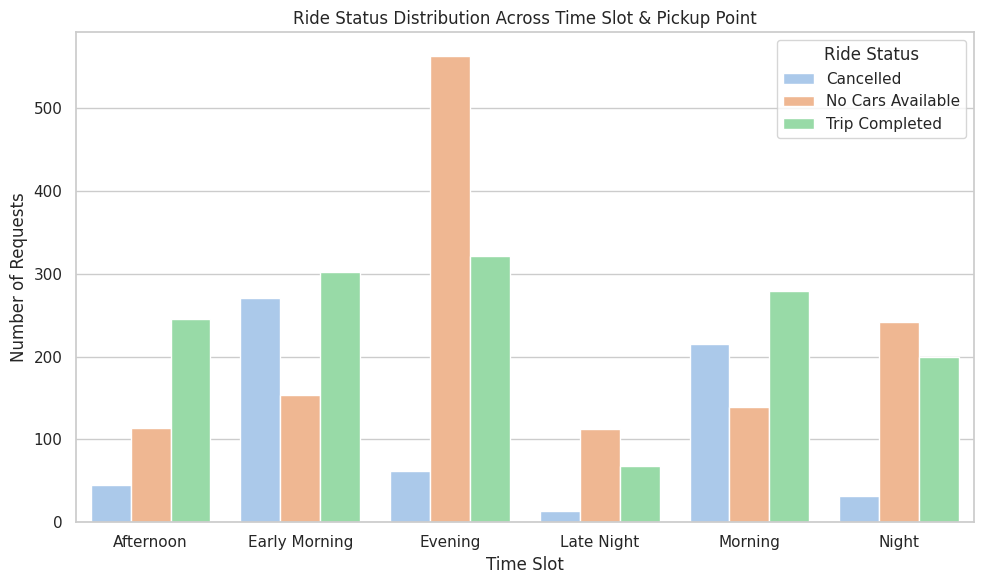

In [ ]:
#Time Slot vs Pickup Point vs Status (Grouped Bar Plot)

# Create a grouped count dataframe
grouped = Uber.groupby(['Time Slot', 'Pickup point', 'Status']).size().reset_index(name='Count')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Time Slot', y='Count', hue='Status', ci=None, palette='pastel')

# Styling
plt.title('Ride Status Distribution Across Time Slot & Pickup Point')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.xticks()
plt.legend(title='Ride Status')
plt.tight_layout()
plt.show()

Why This Chart?

This chart compares ride outcomes — Completed, Cancelled, and No Cars Available — across different **time slots** and **pickup points** (City vs Airport). It helps in identifying peak failure windows and supply gaps by both **time and location**, making it highly actionable for business planning.

**Insights:**

- **Evening at the Airport** faced the **highest “No Cars Available” count (1067)** — a severe supply issue.
- **City in the Early Morning** saw **maximum cancellations (526)** — possibly due to fewer drivers or user behavior.
- **Trip completions** were generally higher in the **City** across most time slots, especially in the **Afternoon (266)** and **Morning (316)**.
- The **Airport** performed better in the **Early Morning (277)** and **Afternoon (225)** for completions but struggled during **Evenings and Nights**.

**Positive Business Impact:**

This insight allows Uber to:
- **Redistribute driver supply** more efficiently across day-parts.
- Plan **airport-specific supply boosts** during evening hours.
- Address **cancellation root causes** in early mornings at City locations.

**Insight Leading to Negative Growth:**

The **Airport facing over 1000 “No Cars Available”** in the **Evening** (1067) may result in losing time-sensitive or premium travelers, damaging Uber’s brand perception in a critical segment.



### Chart 17: Trip Duration vs Status vs Pickup Point

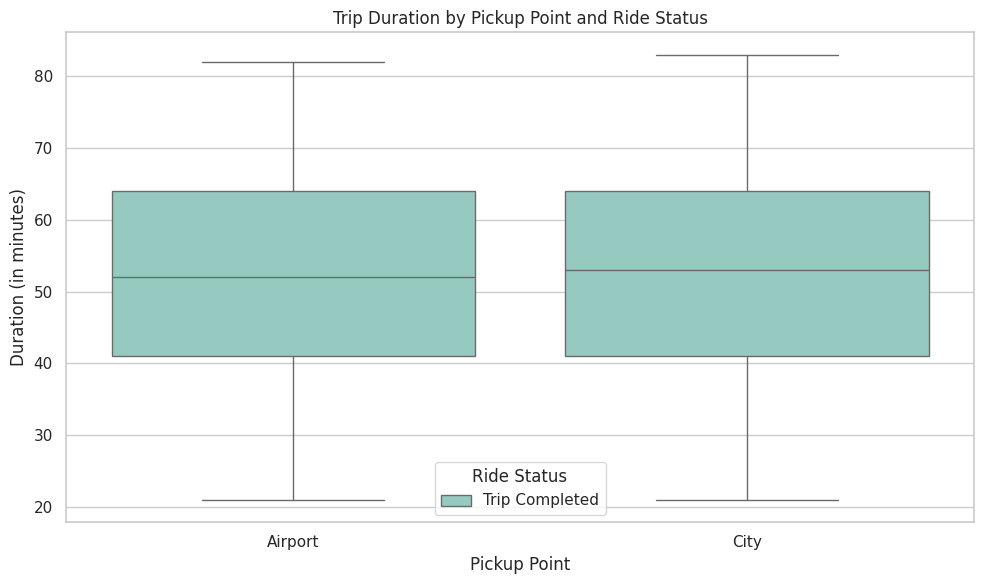

In [ ]:
#Trip Duration vs Status vs Pickup Point

# Filter only rows where Trip Duration is not null
duration_data = Uber[~Uber['Trip duration'].isna()]

# Plot using seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=duration_data,
            x='Pickup point',
            y='Time Duration In Mins.',
            hue='Status',
            palette='Set3')

# Styling
plt.title('Trip Duration by Pickup Point and Ride Status')
plt.xlabel('Pickup Point')
plt.ylabel('Duration (in minutes)')
plt.legend(title='Ride Status')
plt.tight_layout()
plt.show()


In [ ]:
# Get descriptive statistics for trip duration by Pickup Point and Status
duration_summary = duration_data.groupby(['Pickup point', 'Status'])['Time Duration In Mins.'].describe()
print(duration_summary[['count', 'mean', 'min', '25%', '50%', '75%', 'max']])


                              count       mean   min   25%   50%   75%   max
Pickup point Status                                                         
Airport      Trip Completed  1327.0  52.241145  21.0  41.0  52.0  64.0  82.0
City         Trip Completed  1504.0  52.561835  21.0  41.0  53.0  64.0  83.0


Why This Chart?

This chart compares **trip durations** based on **pickup location** (City vs Airport) and **ride status**, helping determine if longer trips or certain locations are linked with ride failures or inefficiencies. It also aids in reviewing whether **location impacts trip time**.

**Insights:**

- The **average trip duration** was nearly identical across both locations:
  - **Airport**: 52.24 mins (mean), median = 52 mins
  - **City**: 52.56 mins (mean), median = 53 mins
- The most common duration range (25th–75th percentile) for both is **41 to 64 minutes**.
- The **maximum duration** was slightly longer for City (83 mins) vs Airport (82 mins).
- **No major variation in trip length** was observed between the two pickup points.

**Positive Business Impact:**

- Confirms that **trip duration is consistent across zones**, so performance issues like cancellations or no car availability are **not caused by longer trip expectations**.
- Uber can **focus operational improvements** (like driver supply or scheduling) without adjusting time estimates across pickup zones.

**Insight Leading to Negative Growth:**

- Although trip durations are stable, **if users perceive longer wait or ride times at certain locations**, it may cause dissatisfaction — regular communication on ETA accuracy is important.


### Chart 18: Driver Assigned vs Status vs Time Slot

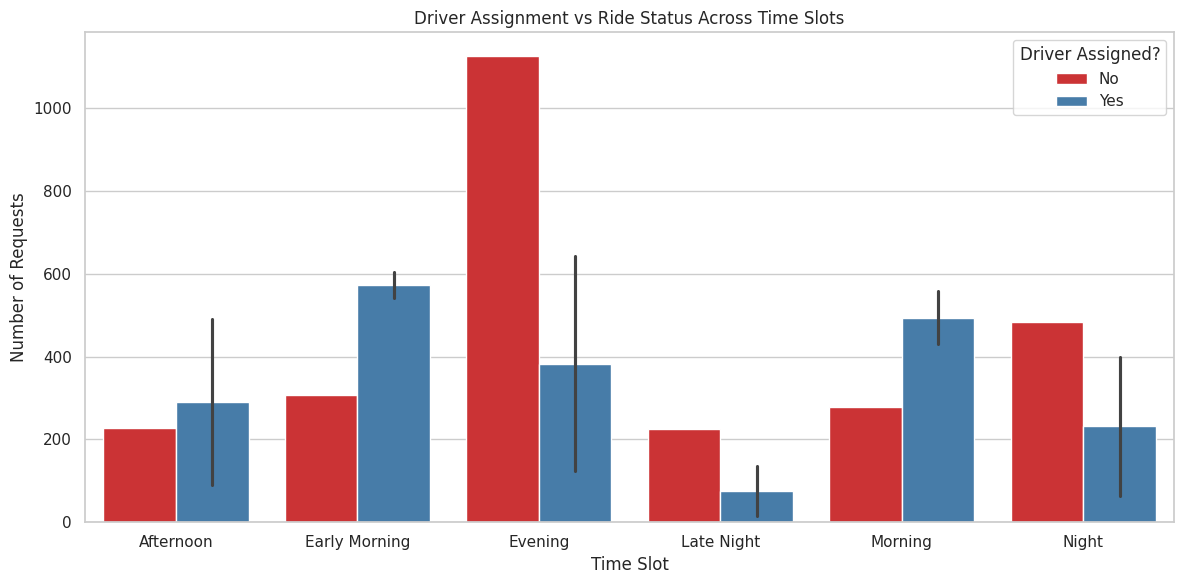

In [ ]:
#Driver Assigned vs Status vs Time Slot

# Create a grouped count dataframe
driver_status_group = Uber.groupby(['Time Slot', 'Driver assigned or not ?', 'Status']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=driver_status_group,x='Time Slot',y='Count',hue='Driver assigned or not ?',palette='Set1')

# Styling
plt.title('Driver Assignment vs Ride Status Across Time Slots')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.legend(title='Driver Assigned?')
plt.xticks()
plt.tight_layout()
plt.show()


Why This Chart?
This chart explores how **driver assignment** influences **ride outcomes** (Completed, Cancelled, No Cars Available) across different **time slots**. It is designed to uncover whether driver unavailability is the main reason for ride failures during peak or off-peak hours.

**Insights:**

- **All “No Cars Available” cases occurred when no driver was assigned.** This confirms that supply shortage is **directly tied to driver non-assignment**.
- **Trip completions occurred only when a driver was assigned.** For example:
  - **Afternoon**: 491 trips completed with driver assigned, **0 without**.
  - **Morning**: 559 trips completed with driver assigned, **0 without**.
  - **Evening**: 642 completed with assignment, **0 without**.
- **Cancellations** occurred **even when a driver was assigned**, particularly during:
  - **Early Morning** (541 cancellations),
  - **Morning** (430 cancellations),
  - **Evening** (124 cancellations).

**Positive Business Impact:**

- The insights **clearly justify the need to assign drivers promptly** to avoid “No Cars Available” cases, especially during **Evening** and **Early Morning**.
- Enables **proactive supply planning** — Uber can identify underperforming slots and deploy targeted driver incentive programs.

**Insight Leading to Negative Growth:**

- If driver assignment remains low during high-demand hours like **Evening** and **Morning**, Uber risks **losing customer trust**, particularly in critical slots where demand exceeds supply but no drivers are available.


---



### Chart 19: Correlation Heatmap (Numeric Features)

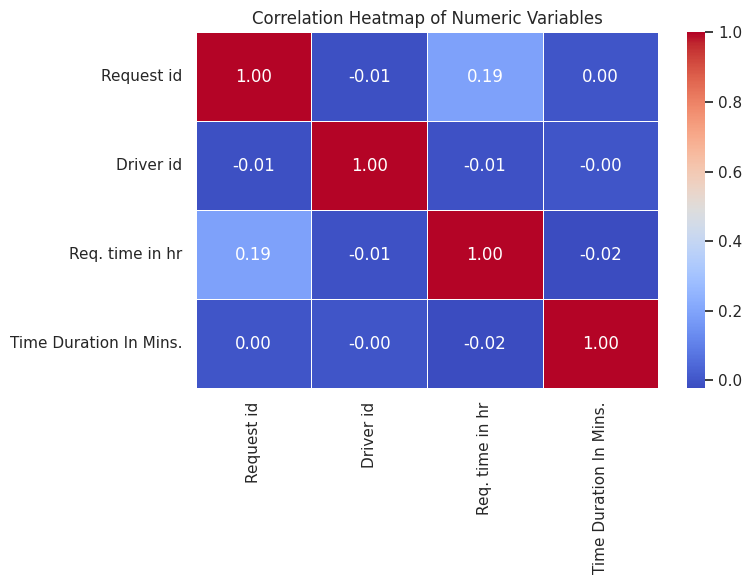

In [ ]:
# Select only numerical columns
numeric_cols = Uber.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()


Why This Chart?
Correlation heatmaps help to understand **linear relationships** between numerical variables. It’s crucial when looking for **predictors** or identifying **dependencies** between key metrics like ride times, driver assignments, or timestamps.

**Insights:**

- **No strong correlations** exist among the numeric features. Most values range between **-0.02 and 0.19**, indicating **very weak or no linear relationships**.
- The **Request ID** has a mild correlation (0.19) with **Request time in hour**, likely due to timestamp sequencing — not meaningful analytically.
- **Trip duration** appears **uncorrelated** with request hour, request ID, or driver ID — suggesting **time of request doesn’t influence ride length**.

**Positive Business Impact:**

This analysis **confirms the independence** of key operational metrics — useful when building dashboards or predictive models without fear of multicollinearity.

**Insight Leading to Negative Growth:**

None identified directly, but the **absence of correlation** highlights the need for **deeper categorical/multivariate analysis** rather than relying solely on numeric patterns.


### Chart 20: Pair Plot

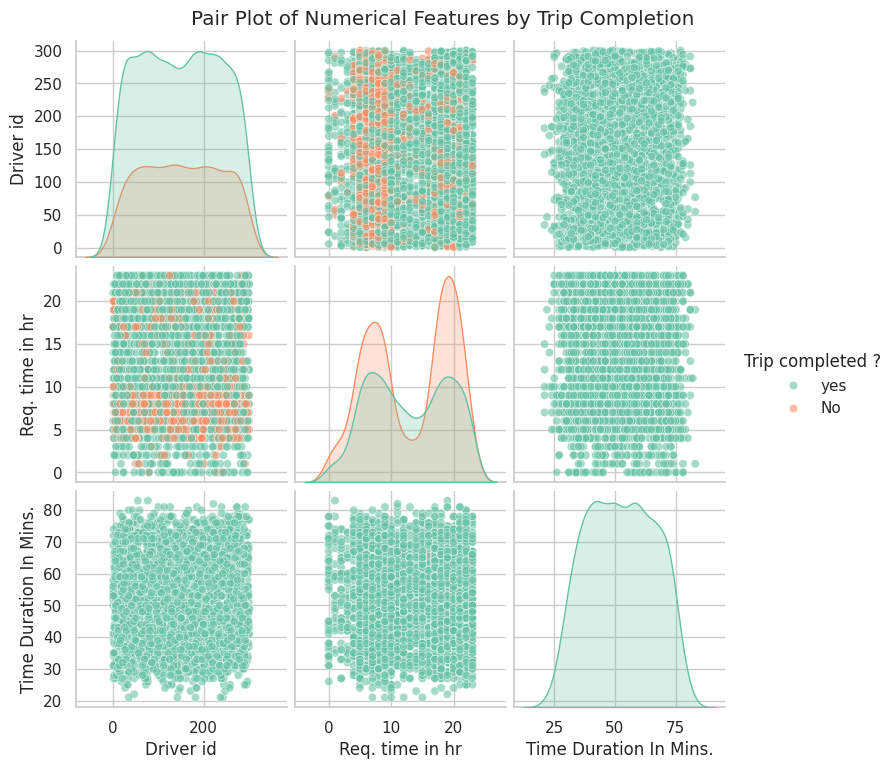

In [ ]:
# Select only the numerical columns
num_cols = ['Driver id', 'Req. time in hr', 'Time Duration In Mins.']

# Create pairplot with hue based on trip completion status
sns.pairplot(Uber[num_cols + ['Trip completed ?']],
             hue='Trip completed ?',
             palette='Set2',
             plot_kws={'alpha': 0.6})

plt.suptitle('Pair Plot of Numerical Features by Trip Completion', y=1.02)
plt.show()


Why This Chart?
A pair plot helps visualize pairwise relationships among numerical features while also separating classes (here: "Trip Completed" vs. "Not Completed"). It’s useful to detect clusters, overlaps, or patterns that could influence completion likelihood.

**Key Insights:**

Driver ID: Appears randomly spread, no strong pattern influencing trip outcome.

Request Time in Hour: Failed trips (orange) have two peaks—around early morning and late evening, matching our earlier insights about time-based issues.

Trip Duration in Mins: Completed trips show an even spread of ride durations between ~25–80 mins. Non-completed trips were not shown due to missing durations.

**Positive Business Impact:**

This reinforces time-based allocation strategies. For example, better supply coverage is needed during cancellation peak hours (early morning & late evening) to improve trip completion rates.

**Insight Leading to Negative Growth:**

Lack of trip completion during high-frequency request hours could lead to customer dissatisfaction, especially when patterns repeat across days. This could push users to switch platforms.



---



# Solution to Business Objective

The core objective of this analysis was to uncover key patterns and inefficiencies in Uber ride requests, especially those causing a supply-demand gap. Through deep Exploratory Data Analysis (EDA), we discovered crucial insights across time slots, pickup locations, driver assignment, and ride statuses. Here’s how these findings translate into actionable business solutions:

1.  **Improve Driver Allocation**During High-Demand Slots
Early Morning & Evening slots showed the highest cancellations and no-car availability.

Uber can increase driver incentives or shift planning during these hours to reduce failures.

2.  **Strategic Deployment** Between City and Airport
The City had more cancellations, while the Airport faced higher unavailability.

A balanced driver distribution strategy should be employed using predictive demand models.

3.  **Smart Driver Assignment Systems**
Most unassigned requests failed.

Implement real-time driver availability tracking and smart auto-assignment algorithms to close this gap.

4.  **Time Slot-Based Pricing** and Promotions
Use dynamic pricing or time-specific offers during low-demand hours to balance load.

Run targeted campaigns in problematic slots to reduce user churn.

5.  **Better Forecasting & Resource Planning**
Use historical ride status vs. hour/day analysis to forecast demand spikes.

Helps in planning staffing, driver shifts, and proactive app notifications to avoid user frustration.



---



# Business Recommendations:

To improve service and close the supply-demand gap, Uber should take the following next steps:

- Launch a Driver Availability Boost Program
Give incentives or bonuses to drivers who work during high-demand times like early morning and evening.

- Set Up a Zone-Based Alert System
Use alerts to guide idle drivers toward the Airport or City based on real-time demand.

- Use a Smart Auto-Assignment Feature
Don’t wait for manual driver allocation. Let the app auto-assign available drivers instantly when a request is raised.

- Create a Rider Compensation Plan
Offer coupons or credits to riders who frequently face “No Cars Available” or cancellations, to improve retention.

- Develop a Demand Forecast Tool
Use historical data to predict when and where ride requests will increase, and plan driver shifts accordingly.

- Train Drivers on Cancellation Handling
Educate drivers on how to manage cancellation reasons professionally, especially in city areas.



---



# **Project Conclusion**

The data shows that people request the most Uber rides in the evening, followed by morning and night. Out of all the requests, many were not completed because either no cars were available or drivers cancelled. Only 42% of all ride requests were successfully completed, which means more than half of the people didn’t get a ride.

Most requests came from city areas, but airport requests failed more often. At the airport, people often didn’t get rides because drivers were not available, showing a major supply issue — especially during early morning and late-night hours.

Every weekday had a similar number of ride requests, especially Friday, which had the most. So, there is steady demand throughout the week. Also, the average trip time is around 52 minutes, so trip length isn't the problem — the issue is clearly driver availability.

Looking at each hour of the day, most failed rides (no cars or cancellations) happened during rush hours in the morning (6–9 AM) and evening (5–9 PM). The situation is worst during early morning airport pickups, where hundreds of people didn’t get rides.





---



# Thank You

Thank you for reviewing my project. I hope the insights were helpful in understanding Uber’s supply-demand gap.


---

